<a href="https://colab.research.google.com/github/Lakshitalearning/Churn_Prediction_App/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install --upgrade numpy
!pip install --upgrade scipy
!pip install scikit-learn
!pip install numpy==1.25.
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib
import sklearn
from sklearn.utils import resample
print(sklearn.__version__) # Print the version of the sklearn library
print(np.__version__)

ERROR: Invalid requirement: 'numpy==1.25.': Expected end or semicolon (after version specifier)
    numpy==1.25.
         ~~~~~~^
1.3.2
1.25.2


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


# **DATA PREPROCESSING **

In [ ]:
#checking for null values
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#removing first 3 columns
dataset.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#class distribution of 1 and 0
class_distribution=dataset['Exited'].value_counts()
class_distribution

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
#since uneven class distribution , need resampling for the one which is less to make high
class0=dataset[dataset['Exited']==0]
class1=dataset[dataset['Exited']==1]
unsample_class1=resample(class1, n_samples=len(class0),replace=True,random_state=2 )

In [ ]:
#combining class0 and class1
dataset=pd.concat([class0,unsample_class1])
dataset.shape

(15926, 11)

In [ ]:
data=dataset.iloc[:,:-1].values
target=dataset.iloc[:,-1].values


In [ ]:
data

array([[608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [699, 'France', 'Female', ..., 0, 0, 93826.63],
       [850, 'Spain', 'Female', ..., 1, 1, 79084.1],
       ...,
       [803, 'Germany', 'Female', ..., 0, 0, 22457.25],
       [746, 'France', 'Male', ..., 1, 1, 80344.96],
       [529, 'France', 'Male', ..., 1, 1, 154002.02]], dtype=object)

In [ ]:
target

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#label encoding -> gender column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[:,2]=np.array(le.fit_transform(data[:,2]))
data[0]

array([608, 'Spain', 0, 41, 1, 83807.86, 1, 0, 1, 112542.58], dtype=object)

In [ ]:
#one hot encoding ->geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
data=np.array(ct.fit_transform(data))
data[0]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

# **EDA**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 1 to 8674
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15926 non-null  int64  
 1   Geography        15926 non-null  object 
 2   Gender           15926 non-null  object 
 3   Age              15926 non-null  int64  
 4   Tenure           15926 non-null  int64  
 5   Balance          15926 non-null  float64
 6   NumOfProducts    15926 non-null  int64  
 7   HasCrCard        15926 non-null  int64  
 8   IsActiveMember   15926 non-null  int64  
 9   EstimatedSalary  15926 non-null  float64
 10  Exited           15926 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.5+ MB


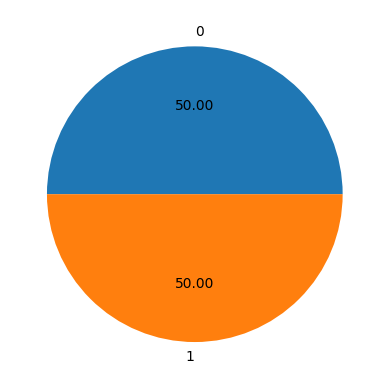

In [ ]:
plt.pie(dataset['Exited'].value_counts().values,labels=['0','1'],autopct='%0.2f')
plt.show()

# **MODEL BUILD**

In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test=train_test_split(data,target,test_size=0.2,random_state=2)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_train=sc.fit_transform(data_train)
data_test=sc.transform(data_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
lr=LogisticRegression()
lr.fit(data_train,target_train)
target_pred=lr.predict(data_test)
print("Accuracy Score-",accuracy_score(target_test,target_pred))
print("Matrix:",confusion_matrix(target_test,target_pred))
print("Precision_score-",precision_score(target_test,target_pred))

Accuracy Score- 0.7200251098556183
Matrix: [[1173  380]
 [ 512 1121]]
Precision_score- 0.7468354430379747


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(data_train,target_train)
target_pred=rf.predict(data_test)
print("Accuracy Score-",accuracy_score(target_test,target_pred))
print("Matrix:",confusion_matrix(target_test,target_pred))
print("Precision_score-",precision_score(target_test,target_pred))

Accuracy Score- 0.9544883866917765
Matrix: [[1435  118]
 [  27 1606]]
Precision_score- 0.931554524361949


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(data_train,target_train)
target_pred=dt.predict(data_test)
print("Accuracy Score-",accuracy_score(target_test,target_pred))
print("Matrix:",confusion_matrix(target_test,target_pred))
print("Precision_score-",precision_score(target_test,target_pred))

Accuracy Score- 0.9293785310734464
Matrix: [[1352  201]
 [  24 1609]]
Precision_score- 0.888950276243094


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(data_train,target_train)
target_pred=gb.predict(data_test)
print("Accuracy Score-",accuracy_score(target_test,target_pred))
print("Matrix:",confusion_matrix(target_test,target_pred))
print("Precision_score-",precision_score(target_test,target_pred))

Accuracy Score- 0.8069679849340866
Matrix: [[1306  247]
 [ 368 1265]]
Precision_score- 0.8366402116402116


In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(data_train,target_train)
target_pred=svc.predict(data_test)
print("Accuracy Score-",accuracy_score(target_test,target_pred))
print("Matrix:",confusion_matrix(target_test,target_pred))
print("Precision_score-",precision_score(target_test,target_pred))

Accuracy Score- 0.8047708725674827
Matrix: [[1269  284]
 [ 338 1295]]
Precision_score- 0.8201393286890437


In [ ]:
#using ANN Neural Network
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.6))
ann.add(tf.keras.layers.BatchNormalization())

ann.add(tf.keras.layers.Dense(units=64,activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.6))
ann.add(tf.keras.layers.BatchNormalization())

ann.add(tf.keras.layers.Dense(units=128,activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.6))
ann.add(tf.keras.layers.BatchNormalization())

ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
ann.compile(optimizer=custom_optimizer,loss='binary_crossentropy',metrics=['accuracy'])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history=ann.fit(data_train,target_train,batch_size=32,epochs=60,validation_data=(data_test,target_test),callbacks=[early_stopping])

Epoch 1/60
399/399 [==============================] - 9s 12ms/step - loss: 0.7695 - accuracy: 0.5485 - val_loss: 0.5745 - val_accuracy: 0.7348
Epoch 2/60
399/399 [==============================] - 3s 7ms/step - loss: 0.6453 - accuracy: 0.6355 - val_loss: 0.5438 - val_accuracy: 0.7420
Epoch 3/60
399/399 [==============================] - 1s 3ms/step - loss: 0.6097 - accuracy: 0.6813 - val_loss: 0.5333 - val_accuracy: 0.7552
Epoch 4/60
399/399 [==============================] - 1s 3ms/step - loss: 0.5906 - accuracy: 0.7030 - val_loss: 0.5211 - val_accuracy: 0.7608
Epoch 5/60
399/399 [==============================] - 1s 3ms/step - loss: 0.5811 - accuracy: 0.7078 - val_loss: 0.5128 - val_accuracy: 0.7630
Epoch 6/60
399/399 [==============================] - 1s 4ms/step - loss: 0.5747 - accuracy: 0.7144 - val_loss: 0.5084 - val_accuracy: 0.7668
Epoch 7/60
399/399 [==============================] - 1s 3ms/step - loss: 0.5728 - accuracy: 0.7180 - val_loss: 0.5112 - val_accuracy: 0.7709
Epoch

### Till now RandomForestClassifier has given the best Result with accuracy of 85% and precision of 80%

In [ ]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(ct,open('encoder.pkl','wb'))
pickle.dump(le,open('gender_encoder.pkl','wb'))